# Import

In [1]:
# import modules
import pandas as pd
import numpy as np
import spotipy

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.10f}'.format)
# NOTE: underscore separaters ('_') are better than commas (',') because 
# numbers with underscores work in Python without any extra effort.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Import Data
from: Kevin 820 Data Import and Clean.ipynb

In [2]:
desired_formatting = [
    'id', 'song', 'artist',
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'time_signature', 'valence'
]

desired_formatting_timeseries = [
    'date', 
    'id', 'song', 'artist',
    'rank', 'last-week', 'peak-rank', 'weeks-on-board',
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'time_signature', 'valence'
]

# datatypes to reduce file sizes and increase calculation speed
# Int8 and float16 is enough to store data, but error occur with descriptive stats
# Try Int16 and float32
dtypes = {
    'key': 'Int16', 'mode': 'Int16', 'time_signature': 'Int16', 'tempo': 'float32', 
    'acousticness': 'float32', 'danceability': 'float32', 'duration_ms': 'Int32', 
    'energy': 'float32', 'instrumentalness': 'float32', 'liveness': 'float32', 
    'loudness': 'float32', 'speechiness': 'float32', 'valence': 'float32'
} 

dtypes_timeseries = {
    'rank': 'Int16', 'last-week': 'Int16', 'peak-rank': 'Int16', 'weeks-on-board': 'Int16'
}

# all songs with audio features (combined from 3 sources)
df_10M = pd.read_csv('every_song_with_data.csv', dtype=dtypes)
df_10M = df_10M[desired_formatting]

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_csv(
    'all_audio_features_billboard_100.csv', 
    dtype={**dtypes, **dtypes_timeseries}
)
df_B100 = df_B100[desired_formatting_timeseries]
df_B100['date'] = pd.to_datetime(df_B100['date'])

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_csv('all_audio_features_billboard_100_songs.csv', dtype=dtypes)
df_B100_songs = df_B100_songs[desired_formatting]

In [3]:
# No errors with Int16 and float32

df_10M.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.4213421047,0.3735598326,0.0000000000,0.0335000008,0.3359999955,0.8169999719,0.9959999919
danceability,0.5275657177,0.1904722154,0.0000000000,0.3959999979,0.5450000167,0.6759999990,1.0000000000
duration_ms,97.4084946090,159341.5907809948,0.0000000000,169600.0000000000,216933.0000000000,275080.0000000000,19672058.0000000000
energy,0.5446365476,0.2815802395,0.0000000000,0.3100000024,0.5669999719,0.7889999747,1.0000000000
instrumentalness,0.2578041255,0.3736388981,0.0000000000,0.0000013200,0.0020999999,0.6449999809,1.0000000000
key,5.2371749580,3.5424904071,0.0000000000,2.0000000000,5.0000000000,8.0000000000,11.0000000000
liveness,0.2096685618,0.1800441295,0.0000000000,0.0964000002,0.1289999932,0.2619999945,1.0000000000
loudness,-10.9673919678,6.3175172806,-60.0000000000,-13.6750001907,-9.1960000992,-6.3979997635,7.2340002060
mode,0.6610928813,0.4733382585,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000
speechiness,0.0977755114,0.1350511312,0.0000000000,0.0357999988,0.0469999984,0.0821999982,0.9739999771


# SIGNIFICANT FIGURES CHECK

In [4]:
# 3 sig figs of accuracy is adequate for audio features
# everything beyond that appears to be rounding error, and shouldn't affect calculations
# float16 is adequate to store data (but float32 is required for statistical calculations)

df_10M.query('id=="33ZXjLCpiINn8eQIDYEPTD"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
22205,33ZXjLCpiINn8eQIDYEPTD,"Shook Ones, Pt. II",Mobb Deep,0.0146000003,0.7630000114,325506,0.7860000134,0.0114000002,10,0.0816999972,-6.4720001221,0,0.2290000021,93.8570022583,4,0.5040000081


In [5]:
df_10M.query('id=="2jKoVlU7VAmExKJ1Jh3w9P"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
392848,2jKoVlU7VAmExKJ1Jh3w9P,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",Tash,0.1800000072,0.8930000067,219160,0.5139999986,0.0000000000,11,0.0595999993,-5.0799999237,1,0.2829999924,95.8479995728,4,0.7870000005


In [6]:
df_10M.query('id=="7iL6o9tox1zgHpKUfh9vuC"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
22198,7iL6o9tox1zgHpKUfh9vuC,In Da Club,50 Cent,0.2549999952,0.8989999890,193466,0.7129999995,0.0000000000,6,0.0707999989,-2.7520000935,0,0.3659999967,90.0510025024,4,0.7770000100


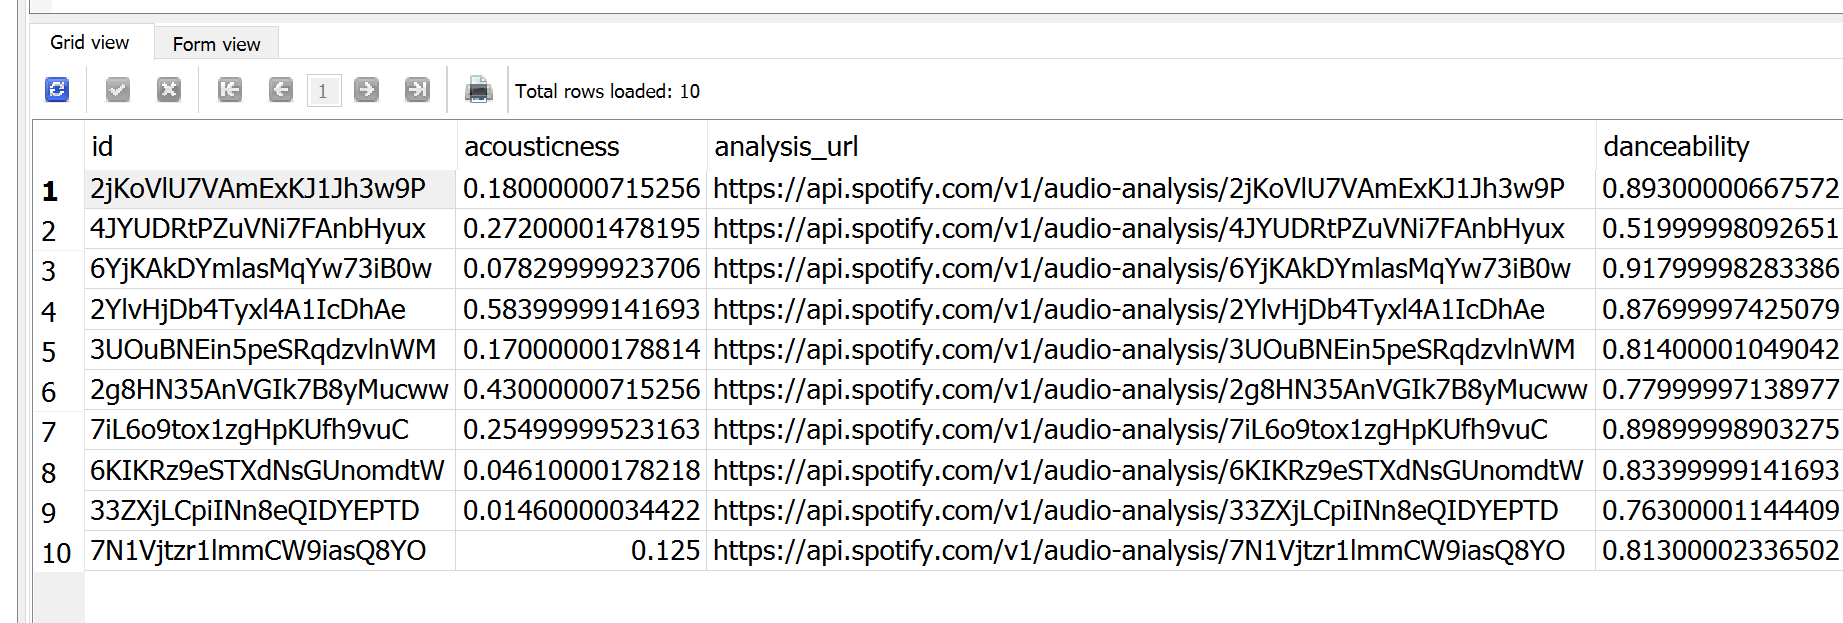

# Data Conversion and Saving

In [7]:
# # NOTE: before data type optimisation, pickle used to be 1.5GB
# # now it is 1.0GB, still too big for git LFS

# df_10M.to_pickle('df_10M.pickle')
# df_B100.to_pickle('df_B100.pickle')
# df_B100_songs.to_pickle('df_B100_songs.pickle')

In [14]:
# now it is 0.66GB, should work with git LFS
df_10M.to_parquet('df_10M.parquet')
df_B100.to_parquet('df_B100.parquet')
df_B100_songs.to_parquet('df_B100_songs.parquet')